# Compare Many Mono-energetic Beta or Gamma Sims
- To install something not included do `!{sys.executable} -m pip install <moduleName>`

In [2]:
import sys, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pickle

import uproot
print(uproot.__version__)

5.1.2


In [3]:
## -------------------------------- ##
##        SET PLOTTING STYLE        ##
## -------------------------------- ##
matplotlib.rcParams['figure.figsize'] = 8.5,6
matplotlib.rcParams['figure.subplot.left'] = 0.15
matplotlib.rcParams['figure.subplot.right'] = 0.88
matplotlib.rcParams['figure.subplot.bottom'] = 0.15
matplotlib.rcParams['figure.subplot.top'] = 0.88
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.labelweight'] = 'normal'
matplotlib.rcParams['font.weight'] = 'normal' 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['xtick.minor.visible'] = True 
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['xtick.direction'] = 'in' 
matplotlib.rcParams['ytick.direction'] = 'in' 
matplotlib.rcParams['xtick.top'] = True 
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['xtick.major.pad'] = 6
matplotlib.rcParams['image.cmap'] = 'viridis'

## Read in Dictionaries and make plots for many sims at once

In [5]:
## ----------------------------------------- ##
##       READ IN DICTS TO MAKE PLOTS         ##
## ----------------------------------------- ##
fileList = ['../Data/Beta_0.1keV_data.pkl', '../Data/Beta_0.5keV_data.pkl', '../Data/Beta_1.0keV_data.pkl', '../Data/Beta_5.0keV_data.pkl', '../Data/Beta_10.0keV_data.pkl']

energyList = ['0.1 keV', '0.5 keV', '1.0 keV', '5.0 keV', '10.0 keV']

dictList = {}

for energyLabel, file in zip(energyList,fileList):

    dictList_temp = {}
    with open(file, 'rb') as inFile:
        dictList_temp = pickle.load(inFile)

    dictList[energyLabel] = dictList_temp

    inFile.close()

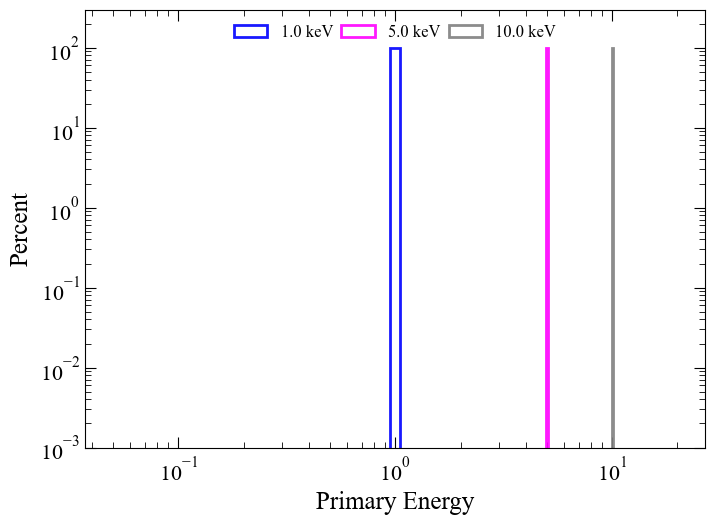

In [6]:
## ---------------------------------- ##
##        Plot Primary Energy         ##
## ---------------------------------- ##
color_list = ['brown', 'green', 'blue', 'magenta', 'grey']

fig, ax = plt.subplots(1,1, dpi=100)

for idx, key in enumerate(dictList):

        if idx < 2: continue

        Eprim = dictList[key]['primaryParticleEnergy']
        nEvents = len(Eprim)

        ax.hist(Eprim, bins=200, range=[0,20], histtype='step', align='left', alpha=0.9,
                color=color_list[idx], lw=2, weights=[100/float(nEvents) for i in range(nEvents)], label=key)

ax.set_xlabel('Primary Energy')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-3,300)
ax.legend(frameon=False, fontsize=12, loc='upper center', ncol=5, columnspacing=0.5)

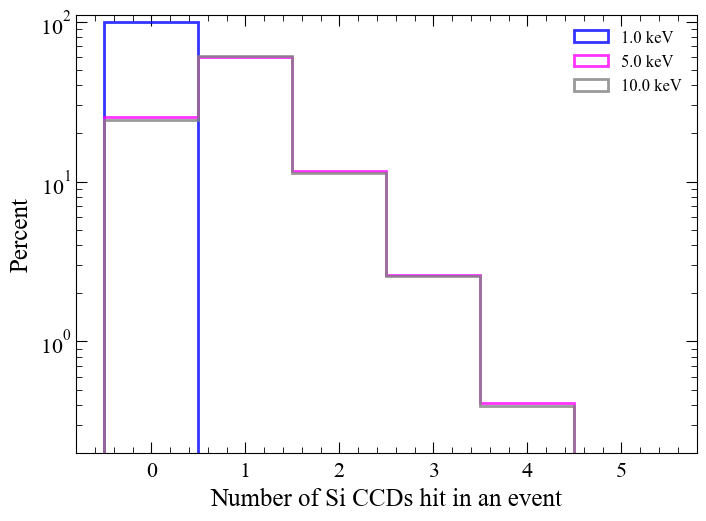

In [7]:
## ---------------------------------- ##
##  Plot Multiplicity of Si CCDs hit  ##
## ---------------------------------- ##

color_list = ['brown', 'green', 'blue', 'magenta', 'grey']

fig, ax = plt.subplots(1,1, dpi=100)

for idx, key in enumerate(dictList):

        if idx < 2: continue
        
        arr = dictList[key]['numSiPanelsHit']
        nEvents = len(dictList[key]['primaryParticleEnergy'])
        
        ax.hist(arr, bins=6, range=[0,6], histtype='step', align='left', alpha=0.8,
                color=color_list[idx], lw=2, weights=[100/float(nEvents) for i in range(nEvents)], label=key)

ax.set_xlabel('Number of Si CCDs hit in an event')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(2e-1,110)
ax.legend(frameon=False, fontsize=12, loc='upper right')

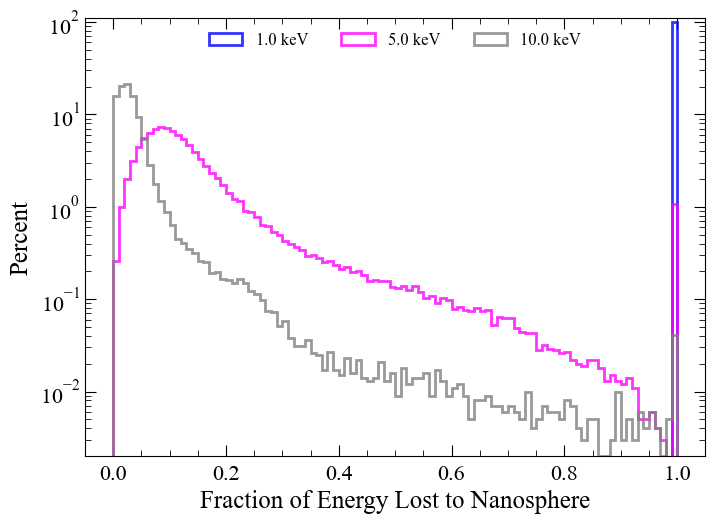

In [8]:
## -------------------------------------------- ##
##  Plot Fraction of Energy Lost to nanosphere  ##
## -------------------------------------------- ##

color_list = ['brown', 'green', 'blue', 'magenta', 'grey']

fig, ax = plt.subplots(1,1, dpi=100)

for idx, key in enumerate(dictList):

        if idx < 2: continue
        
        Edep = dictList[key]['totEdepAllVol']["nanosphere"]
        Eprim = dictList[key]['primaryParticleEnergy']
        nEvents = len(dictList[key]['primaryParticleEnergy'])

        ax.hist(Edep/Eprim, bins=100, range=[0,1], histtype='step', align='mid', alpha=0.8,
                color=color_list[idx], lw=2, weights=[100/float(nEvents) for i in range(nEvents)], label=key)

ax.set_xlabel('Fraction of Energy Lost to Nanosphere')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(2e-3,110)
ax.legend(frameon=False, fontsize=12, loc='upper center', ncol=3)

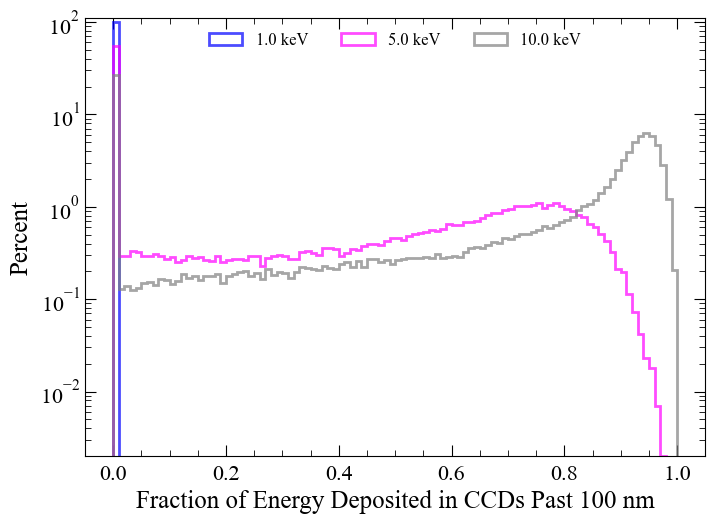

In [9]:
## ------------------------------------------------ ##
##   PLOT FRACTION OF ENERGY DEPOSITED IN ANY CCD   ##
## ------------------------------------------------ ##

color_list = ['brown', 'green', 'blue', 'magenta', 'grey']

fig, ax = plt.subplots(1,1, dpi=100)

for idx, key in enumerate(dictList):

    if idx < 2: continue

    totEdepCombined, totEdepCombined_20nm, totEdepCombined_100nm = np.zeros(nEvents), np.zeros(nEvents), np.zeros(nEvents)
    totEdepAllVol = dictList[key]['totEdepAllVol']
    totEdepCCDVol_20nm = dictList[key]['totEdepCCDVol_20nm']
    totEdepCCDVol_100nm = dictList[key]['totEdepCCDVol_100nm']
    primaryParticleEnergy = dictList[key]['primaryParticleEnergy']
    nEvents = len(dictList[key]['primaryParticleEnergy'])

    ## Check total energy dep in all volumes
    for vol in totEdepAllVol:
        if vol == 'nanosphere':
            continue
        Edep_arr = totEdepAllVol[vol]
        totEdepCombined += Edep_arr

    ## check total energy dep past 100 nm deadlayer 
    for vol in totEdepCCDVol_20nm:
        Edep_arr = totEdepCCDVol_20nm[vol]
        totEdepCombined_20nm += Edep_arr

    ## check total energy dep past 100 nm deadlayer 
    for vol in totEdepCCDVol_100nm:
        Edep_arr = totEdepCCDVol_100nm[vol]
        totEdepCombined_100nm += Edep_arr


    ax.hist(totEdepCombined_100nm/primaryParticleEnergy, bins=100, range=[0,1], histtype='step', align='mid', alpha = 0.7, 
        color=color_list[idx], lw=2, weights=[100/float(nEvents) for i in range(nEvents)], label=key)

ax.set_xlabel('Fraction of Energy Deposited in CCDs Past 100 nm')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(2e-3,110)
ax.legend(frameon=False, loc='upper center', fontsize=12, ncol=3)
    

(0.0, 1.0)

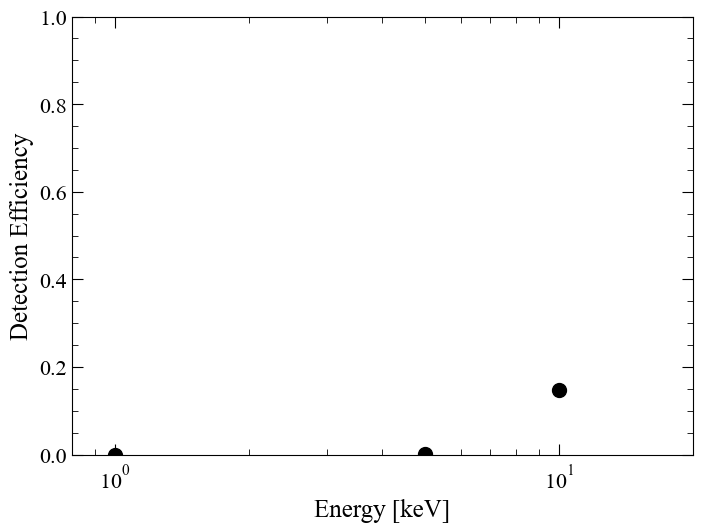

In [10]:
## ------------------------------------------------ ##
##           PLOT DETECTION EFFICIENCY              ##
## ------------------------------------------------ ##

color_list = ['brown', 'green', 'blue', 'magenta', 'grey']
energy_list = [0.1, 0.5, 1.0, 5.0, 10.0]
efficiency_list = []

for idx, key in enumerate(dictList):

    totEdepCombined, totEdepCombined_20nm, totEdepCombined_100nm = np.zeros(nEvents), np.zeros(nEvents), np.zeros(nEvents)
    totEdepAllVol = dictList[key]['totEdepAllVol']
    totEdepCCDVol_20nm = dictList[key]['totEdepCCDVol_20nm']
    totEdepCCDVol_100nm = dictList[key]['totEdepCCDVol_100nm']
    primaryParticleEnergy = dictList[key]['primaryParticleEnergy']

    ## Check total energy dep in all volumes
    for vol in totEdepAllVol:
        if vol == 'nanosphere':
            continue
        Edep_arr = totEdepAllVol[vol]
        totEdepCombined += Edep_arr

    ## check total energy dep past 100 nm deadlayer 
    for vol in totEdepCCDVol_20nm:
        Edep_arr = totEdepCCDVol_20nm[vol]
        totEdepCombined_20nm += Edep_arr

    ## check total energy dep past 100 nm deadlayer 
    for vol in totEdepCCDVol_100nm:
        Edep_arr = totEdepCCDVol_100nm[vol]
        totEdepCombined_100nm += Edep_arr

    eff_req = totEdepCombined_100nm/primaryParticleEnergy > 0.95

    Eff = len(totEdepCombined_100nm[eff_req])/1e5

    efficiency_list.append(Eff)

fig, ax = plt.subplots(1,1, dpi=100)

ax.scatter(energy_list, efficiency_list, color='black')

ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Detection Efficiency')
ax.set_xscale('log')
ax.set_xlim(0.8,20)
ax.set_ylim(0,1)